11/20/20

https://github.com/twiecki/WhileMyMCMCGentlySamples/blob/master/content/downloads/notebooks/copulas.ipynb

# step 1: generate ground truth data
this is the ground truth data that we want to replicate.

In [40]:
import seaborn as sns
from scipy import stats

%matplotlib inline

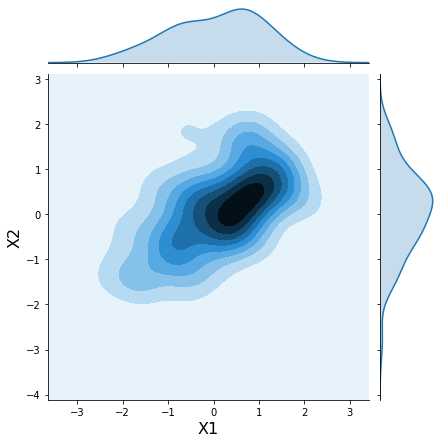

In [42]:
# ignore this for now, since we want to generate an "unknown" joint probability

mvnorm = stats.multivariate_normal(mean=[0, 0], cov=[[1., 0.5], [0.5, 1.]])

n_samples = 100

x = mvnorm.rvs(n_samples)
h = sns.jointplot(x[:, 0], x[:, 1], kind='kde', stat_func=None);
h.set_axis_labels('X1', 'X2', fontsize=16);

## Convert Gaussians to Uniform
Converting distributions to uniform is a necessary intermediary step. It allows us to map from guassians to gamma, or gamma to beta, or beta to gaussians, etc.

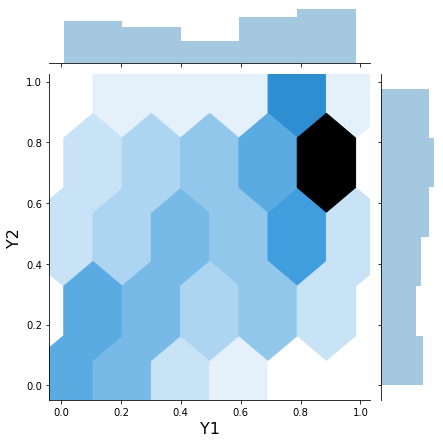

In [43]:
norm = stats.norm()
x_unif = norm.cdf(x)
h = sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='hex', stat_func=None)
h.set_axis_labels('Y1', 'Y2', fontsize=16);

# ground truth distribution

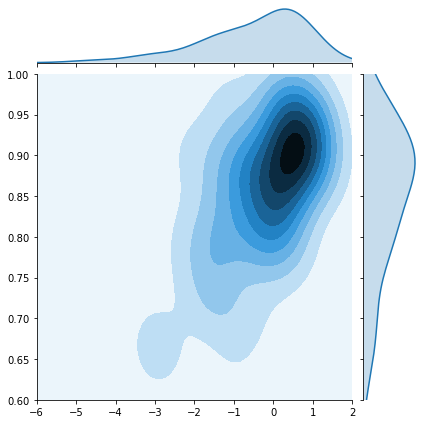

In [45]:
m1 = stats.gumbel_l()
m2 = stats.beta(a=10, b=2)

x1_trans = m1.ppf(x_unif[:, 0])
x2_trans = m2.ppf(x_unif[:, 1])

h = sns.jointplot(x1_trans, x2_trans, kind='kde', xlim=(-6, 2), ylim=(.6, 1.0), stat_func=None);

In [48]:
np.save('data.npy', [x1_trans, x2_trans])

# 2) transform exotic to uniform

In [24]:
def to_uniform(samples, mapping):
    return mapping.cdf(samples)

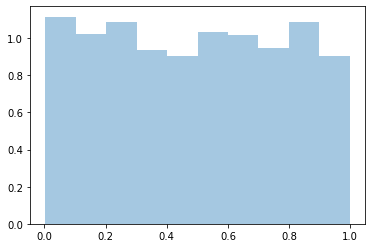

In [25]:
gumbel = stats.distributions.gumbel_l()
# x1_trans_trans = gumbel.cdf(x1_trans)
x1_trans_trans = to_uniform(x1_trans, gumbel)
sns.distplot(x1_trans_trans, kde=False, norm_hist=True);

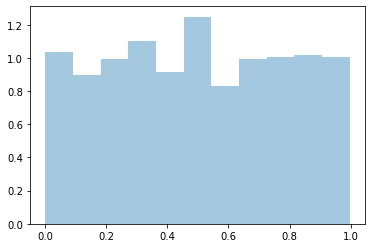

In [26]:
beta = stats.distributions.beta(a=10, b=2)
# x2_trans_trans = beta.cdf(x2_trans)

x2_trans_trans = to_uniform(x2_trans, beta)
sns.distplot(x2_trans_trans, kde=False, norm_hist=True);

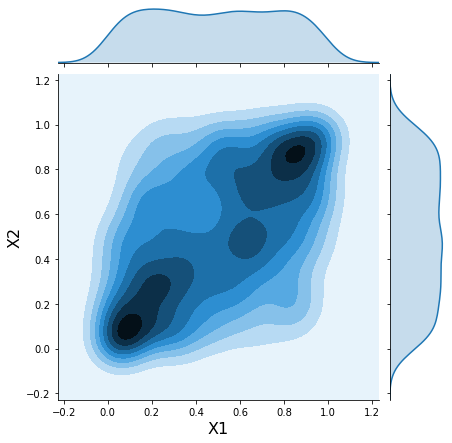

In [27]:
# joint distribution of uniforms
h = sns.jointplot(x1_trans_trans, x2_trans_trans, kind='kde', stat_func=None);
h.set_axis_labels('X1', 'X2');

# convert uniform into gaussian

In [28]:
norm = stats.distributions.norm()
u1 = norm.ppf(x1_trans_trans)
u2 = norm.ppf(x2_trans_trans)

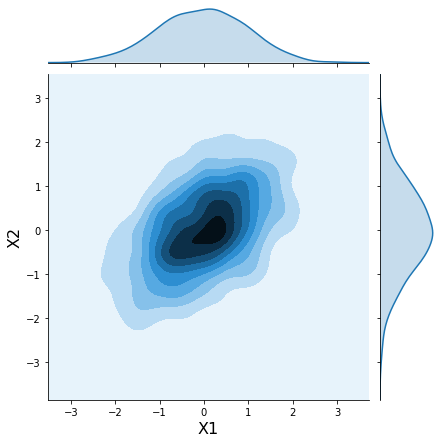

In [29]:
h = sns.jointplot(u1, u2, kind='kde', stat_func=None);
h.set_axis_labels('X1', 'X2', fontsize=16);

In [30]:
import numpy as np

n_samples = 1000

# center since our means are 190 and 70
mu_X1 = np.mean(u1)
mu_X2 = np.mean(u2)

# manually calculate X1/X1 variance, X2/X2 variance, and X1/X2 variance
a = np.dot((u1 - mu_X1), (u1 - mu_X2))/n_samples
b = np.dot((u1 - mu_X1), (u2 - mu_X2))/n_samples
d = np.dot((u2 - mu_X2), (u2 - mu_X2))/n_samples

In [31]:
recovered_covariant = [[a, b], [b, d]]
recovered_covariant

[[0.9694293623477382, 0.4881575868670585],
 [0.4881575868670585, 0.9902689139895212]]

# generate synthetic data

In [35]:
new_mvnorm = stats.multivariate_normal(mean=[0, 0], cov=recovered_covariant)

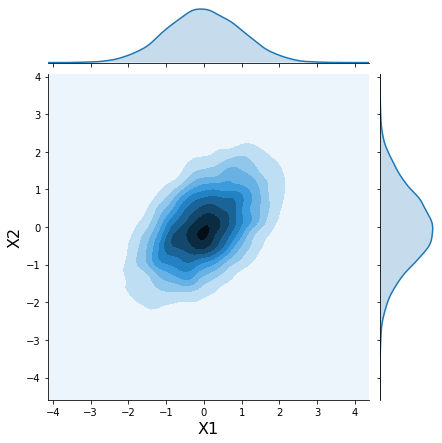

In [49]:
synthetic_x = new_mvnorm.rvs(10000)
h = sns.jointplot(synthetic_x[:, 0], synthetic_x[:, 1], kind='kde', stat_func=None);
h.set_axis_labels('X1', 'X2', fontsize=16);

# convert synthetic guassians to uniform

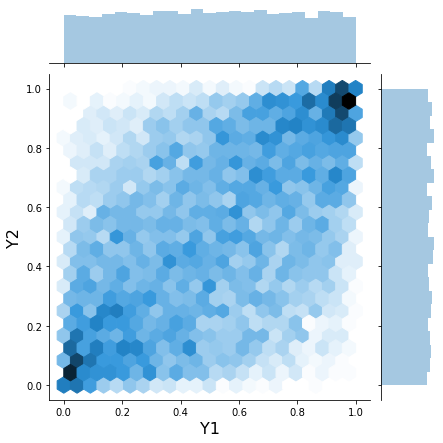

In [38]:
norm = stats.norm()
x_unif = norm.cdf(synthetic_x)
h = sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='hex', stat_func=None)
h.set_axis_labels('Y1', 'Y2', fontsize=16);

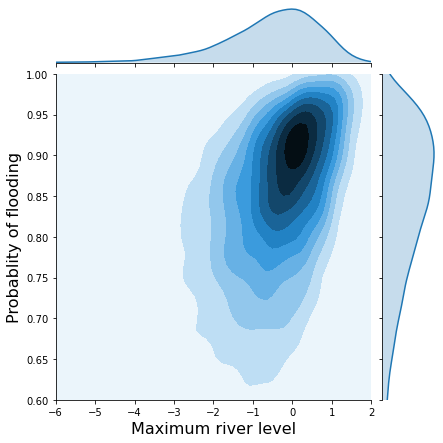

In [39]:
m1 = stats.gumbel_l()
m2 = stats.beta(a=10, b=2)

x1_trans = m1.ppf(x_unif[:, 0])
x2_trans = m2.ppf(x_unif[:, 1])

h = sns.jointplot(x1_trans, x2_trans, kind='kde', xlim=(-6, 2), ylim=(.6, 1.0), stat_func=None);
h.set_axis_labels('Maximum river level', 'Probablity of flooding', fontsize=16);